<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Time_Series_Analysis/blob/main/TSA_EXP_2_Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEASONALITY**

Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of time.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df=pd.read_csv(r'/content/FB.csv',parse_dates=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [ ]:
df.Date = pd.to_datetime(df.Date)
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [ ]:
df['day']

0        8
1        9
2       10
3       11
4       12
        ..
1254     2
1255     3
1256     4
1257     5
1258     6
Name: day, Length: 1259, dtype: int64

## Detecting Seasonality using Multiple Box Plots

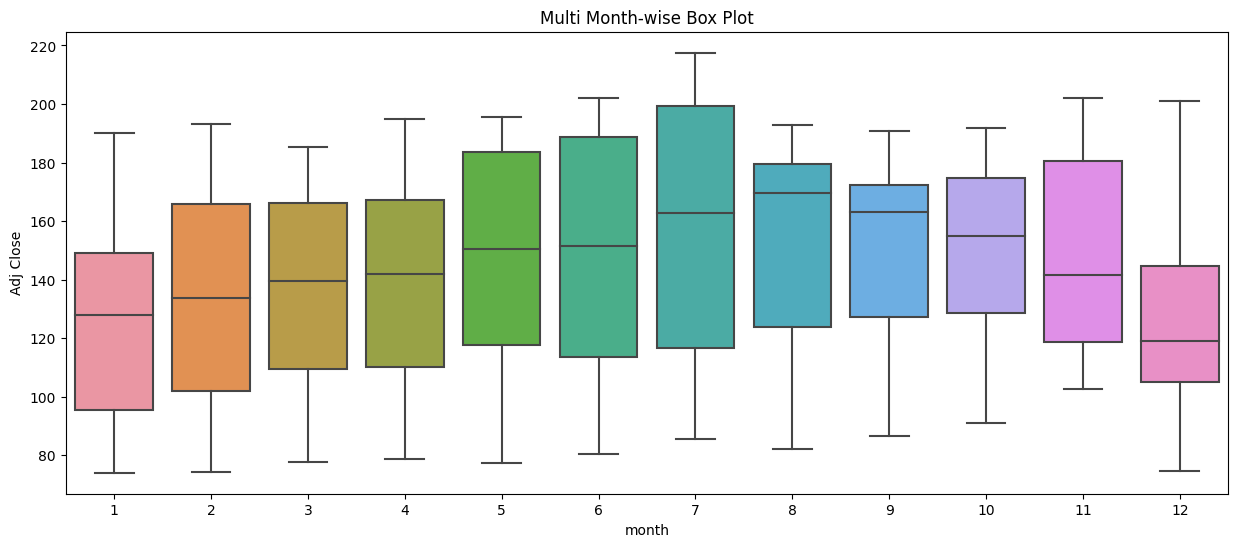

In [ ]:
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='Adj Close', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

# Detecting Seasonality using Autocorrelation Plot

Autocorrelation is used to check randomness in data

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

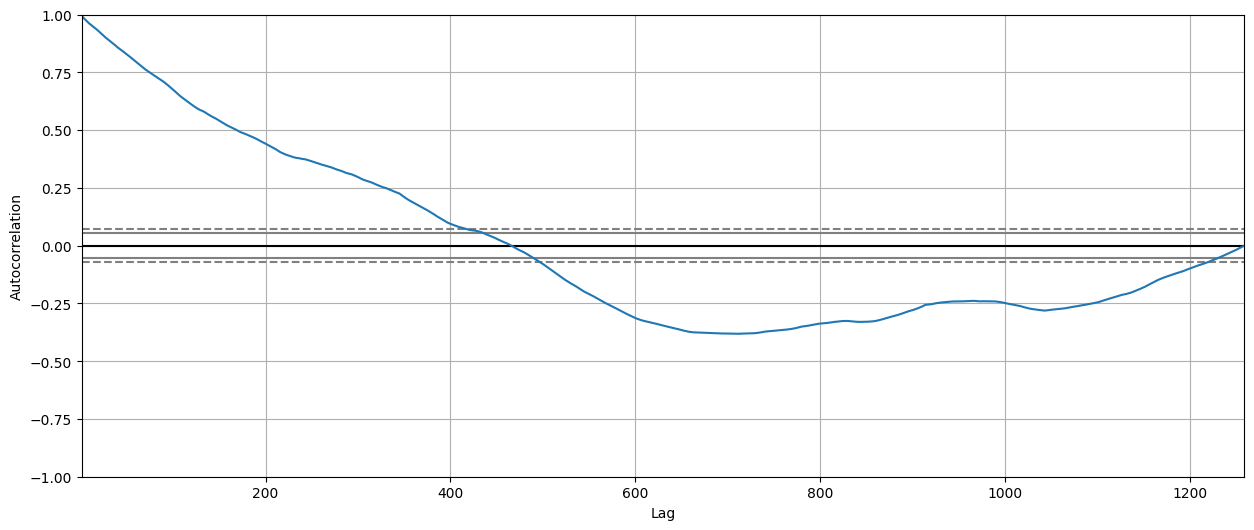

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'/content/FB.csv',index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df['Adj Close'].tolist())

# Deseasoning of Time-Series Data :
Deseasoning means to remove seasonality from time-series data. It is stripped of the pattern of seasonal effect to deseasonalize the impact.  Time-series data contains four main components.

*   Level - means the average value of the time-series data.
*   Trend - means an increasing or decreasing value in time-series data.
*   Seasonality - means repeating the pattern of a cycle in the time-series data.
* Noise - means random variance in time-series data.



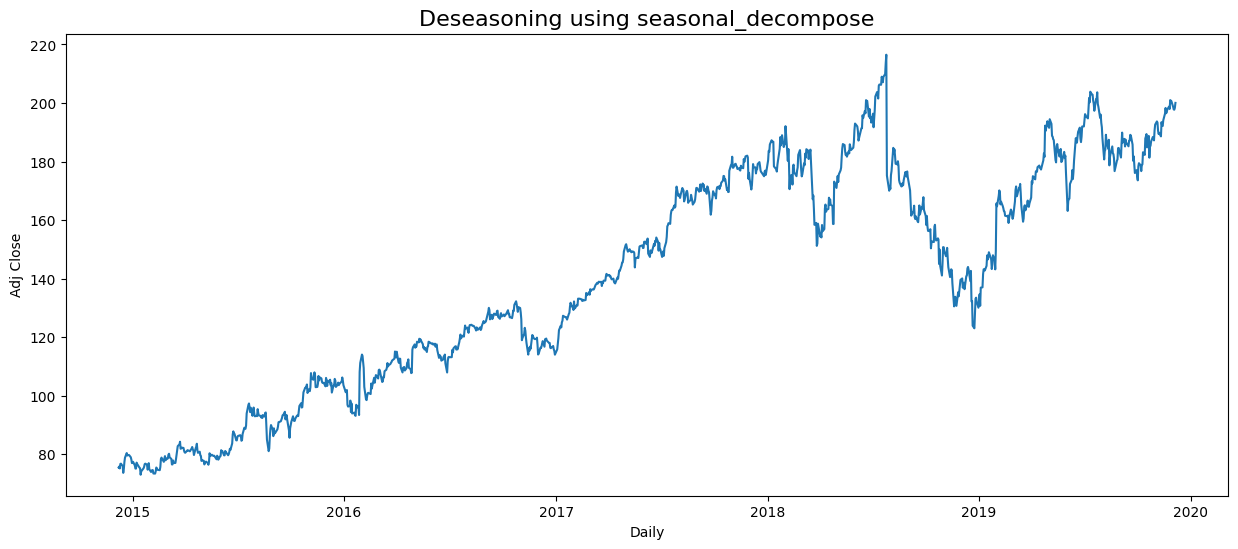

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
pd.read_csv(r'/content/FB.csv',index_col=0,parse_dates=True)
result_mul = seasonal_decompose(df['Adj Close'], model='multiplicative',period=1)
deseason = df['Adj Close'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Daily')
plt.ylabel('Adj Close')
plt.show()

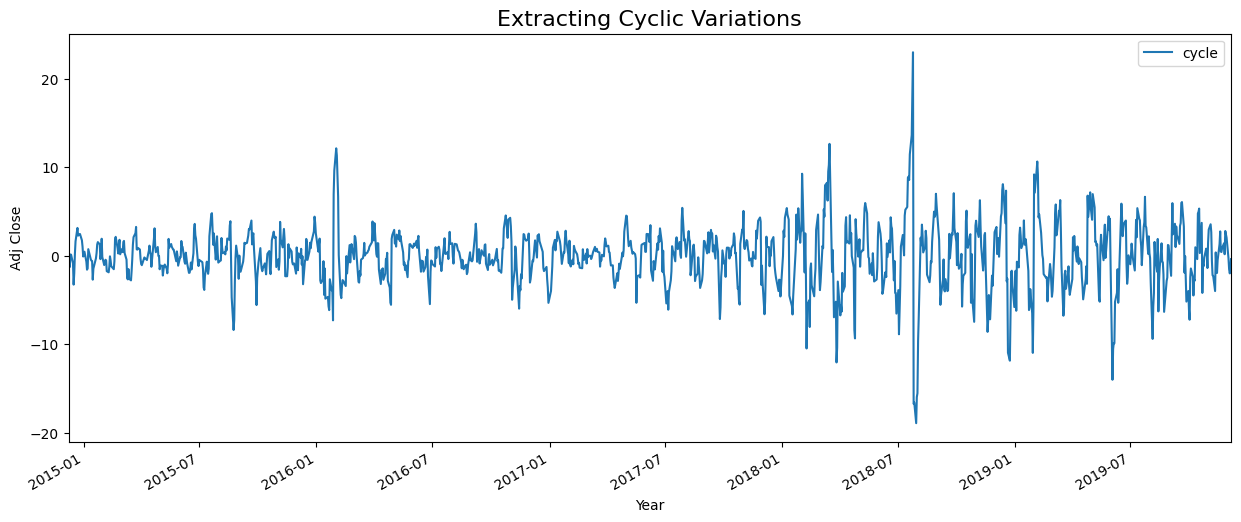

In [ ]:
AdjClose_cycle,AdjClose_trend = hpfilter(df['Adj Close'], lamb=1600)
df['cycle'] =AdjClose_cycle
df['trend'] =AdjClose_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Adj Close')
plt.show()


# DATASET 2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls',parse_dates=True)

In [ ]:
df.head()

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927


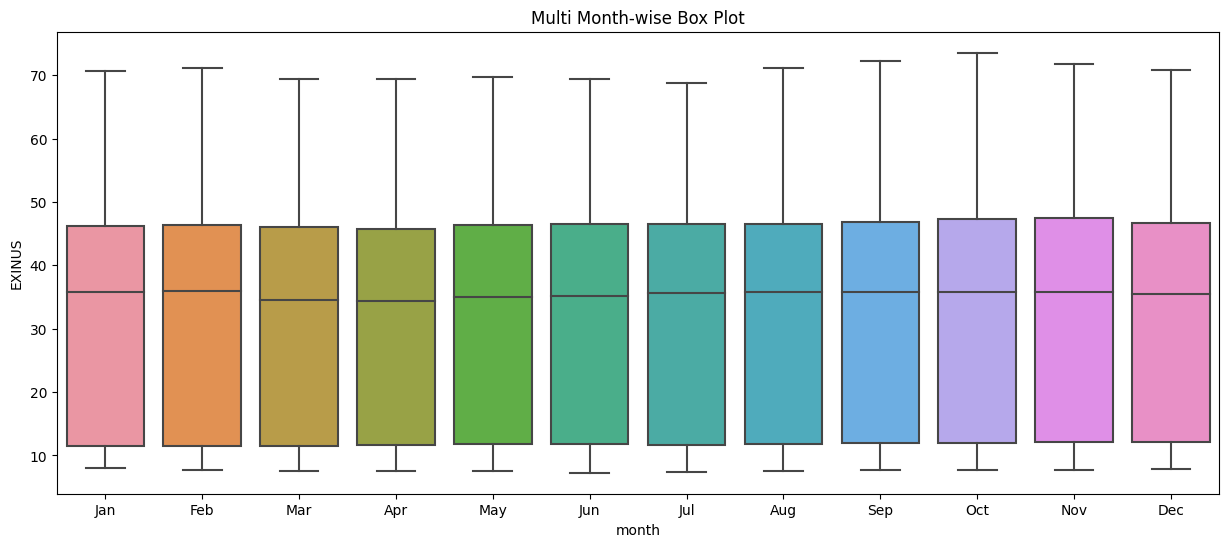

In [ ]:
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in df.observation_date]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

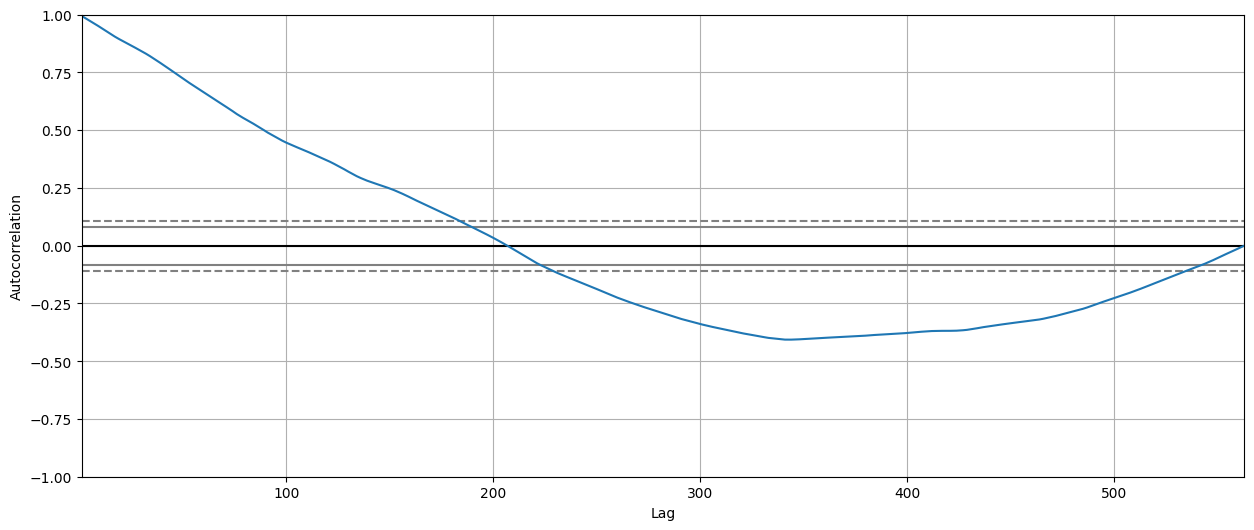

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df.EXINUS.tolist())

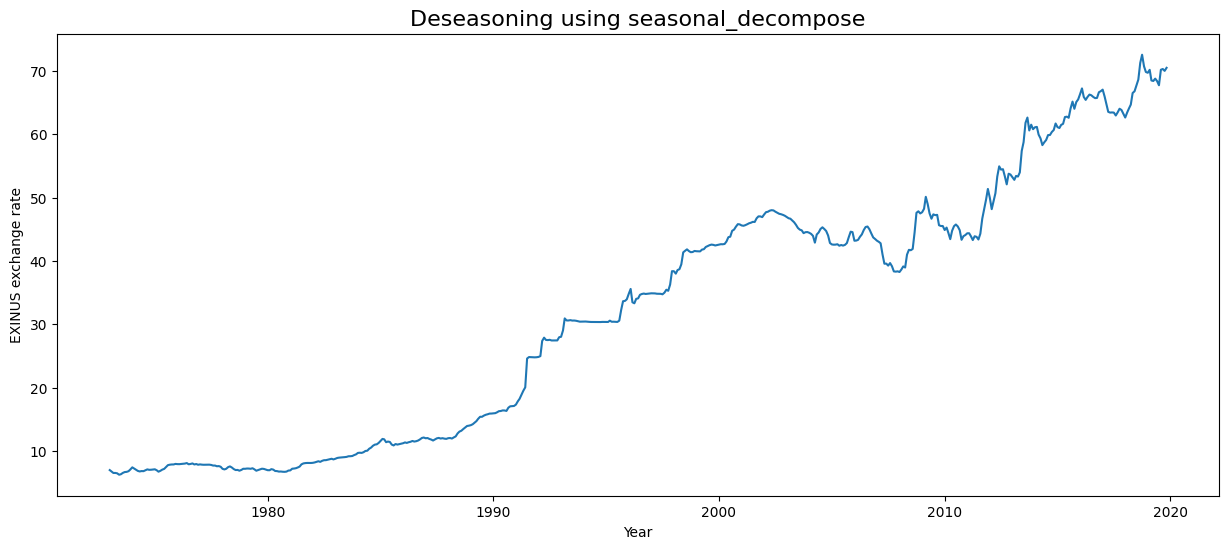

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative')
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

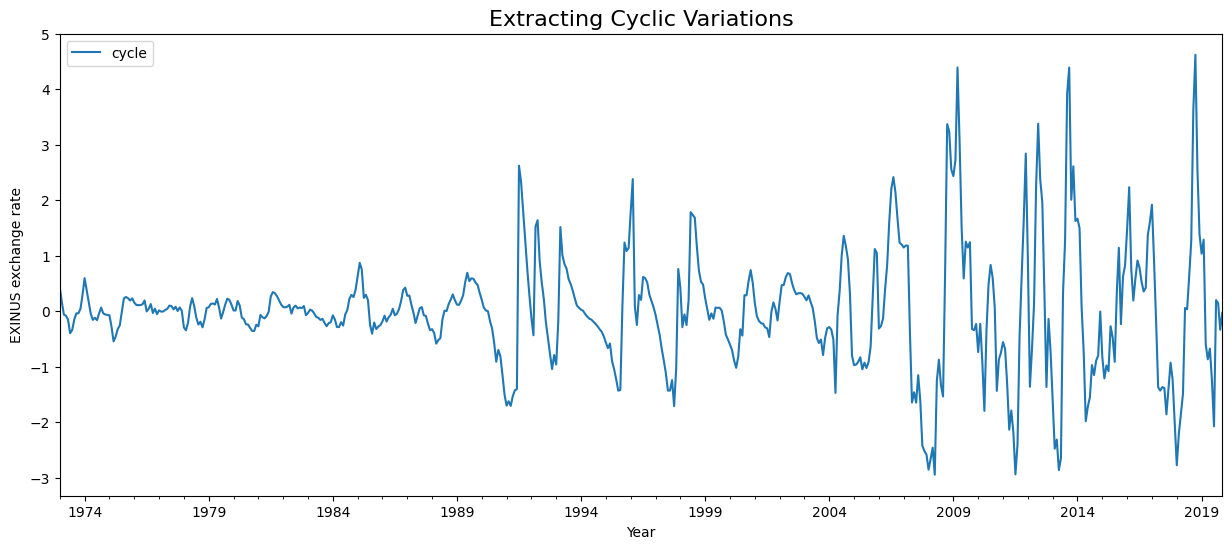

In [ ]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['cycle'] =EXINUS_cycle
df['trend'] =EXINUS_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()